In [1]:
import pandas as pd
import seaborn as sb

In [2]:
file = pd.read_csv('cancer_hpm.csv');
file.head()
file = file.rename(index = str,columns = {'Unnamed: 0':'Gene Name'})
file.head()

,Gene ID,Gene Name,"B cell, adult","CD4-positive T cell, adult","CD8-positive T cell, adult","adrenal gland, adult","brain, fetus","colon, adult","esophagus, adult","frontal cortex, adult",...,"pancreas, adult","placenta, fetus","platelet, adult","prostate gland, adult","rectum, adult","retina, adult","spinal cord, adult","testis, adult","testis, fetus","urinary bladder, adult"
0,ENSG00000000003,TSPAN6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000010,0.000000,0.000000,...,0.000023,0.000000,0.000000,0.000007,0.000000,0.000000,0.000000,0.000007,0.000000,0.000000
1,ENSG00000000419,DPM1,0.000022,0.000010,0.000025,0.000084,0.000009,0.000008,0.000021,0.000014,...,0.000030,0.000032,0.000043,0.000016,0.000016,0.000034,0.000000,0.000051,0.000048,0.000013
2,ENSG00000000457,SCYL3,0.000000,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ENSG00000000938,FGR,0.000017,0.000000,0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000000971,CFH,0.000000,0.000000,0.000000,0.000207,0.000022,0.000256,0.000151,0.000010,...,0.000147,0.000033,0.000050,0.000145,0.000191,0.000011,0.000097,0.000211,0.000010,0.000374


In [3]:
df_gene2 = file[file['Gene Name']== 'TACSTD2'];
df_gene3 = file[file['Gene Name'] =='GPC3'];
df_gene = file[file['Gene Name'] == 'CDH17'];
df_all = pd.concat([df_gene,df_gene2,df_gene3])
df_all.head()

,Gene ID,Gene Name,"B cell, adult","CD4-positive T cell, adult","CD8-positive T cell, adult","adrenal gland, adult","brain, fetus","colon, adult","esophagus, adult","frontal cortex, adult",...,"pancreas, adult","placenta, fetus","platelet, adult","prostate gland, adult","rectum, adult","retina, adult","spinal cord, adult","testis, adult","testis, fetus","urinary bladder, adult"
971,ENSG00000079112,CDH17,0.0,0.0,0.0,0.0,0.0,0.000148,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000218,0.0,0.0,0.0,0.0,0.000000
8381,ENSG00000184292,TACSTD2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000088,0.0,...,0.000096,0.0,0.0,0.000035,0.000000,0.0,0.0,0.0,0.0,0.000012
5468,ENSG00000147257,GPC3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000


In [4]:
df = df_all.drop(['Gene ID'],axis = 1)
#df = df.reset_index([])              #HPM
df = df.drop('Gene Name',axis=1)
df

,"B cell, adult","CD4-positive T cell, adult","CD8-positive T cell, adult","adrenal gland, adult","brain, fetus","colon, adult","esophagus, adult","frontal cortex, adult","gall bladder, adult","gut, fetus",...,"pancreas, adult","placenta, fetus","platelet, adult","prostate gland, adult","rectum, adult","retina, adult","spinal cord, adult","testis, adult","testis, fetus","urinary bladder, adult"
971,0.0,0.0,0.0,0.0,0.0,0.000148,0.000000,0.0,0.0,0.000103,...,0.000000,0.0,0.0,0.000000,0.000218,0.0,0.0,0.0,0.0,0.000000
8381,0.0,0.0,0.0,0.0,0.0,0.000000,0.000088,0.0,0.0,0.000000,...,0.000096,0.0,0.0,0.000035,0.000000,0.0,0.0,0.0,0.0,0.000012
5468,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000


In [6]:
samplenum = df_gene.groupby('').sum()
samplenum['Total patients']
pd.DataFrame(samplenum).drop('Count patients',axis = 1)

KeyError: ''

In [7]:
df2 = df_gene.pivot_table(values = ['Total patients','Count patients'], columns = 'Level', index = 'Tumor')
df2.head()

KeyError: 'Total patients'

In [22]:
percent = df2['Count patients']/df2['Total patients']*100
percent.head()

Level,High,Low,Medium,Not detected
Tumor,,,,
breast cancer,0.0,0.000000,0.0,100.000000
carcinoid,25.0,0.000000,0.0,75.000000
cervical cancer,0.0,8.333333,0.0,91.666667
colorectal cancer,100.0,0.000000,0.0,0.000000
endometrial cancer,0.0,0.000000,0.0,100.000000


(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
         27.5,  28.5,  29.5,  30.5,  31.5]),
 <a list of 32 Text xticklabel objects>)

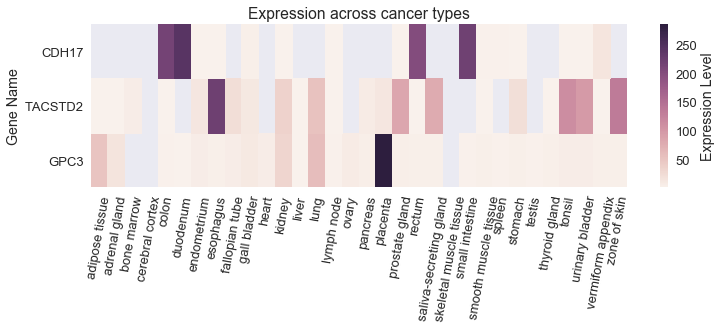

In [264]:
from IPython import get_ipython
import matplotlib.pyplot as plt
mask = df.isnull()
get_ipython().run_line_magic('matplotlib', 'inline')

sb.set(font_scale= 1.3)
mpl.rc("figure", figsize=(12,3))
sb.heatmap(df,cbar_kws={'label':'Expression Level'}, mask = mask,linewidths=0,cbar=True)
plt.title('Expression across cancer types')
plt.xticks(rotation =80)
##
